/Users/nahomsileshi/Documents/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Iteration 1, loss = 12.71269364
Iteration 2, loss = 269.28797059
Iteration 3, loss = 794.33924194
Iteration 4, loss = 1308.68954250
Iteration 5, loss = 1718.18511383
Iteration 6, loss = 2017.85043343
Iteration 7, loss = 2227.79382397
Iteration 8, loss = 2371.26754641
Iteration 9, loss = 2467.85729337
Iteration 10, loss = 2532.27954073
Iteration 11, loss = 2574.98898430
Iteration 12, loss = 2603.19098636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


1   HIToolbox                           0x00007ff8220a2726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8220a22b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff822011cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff8220a2173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff81b5694b7 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81b3be165 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   CoreFoundation                      0x00007ff81819d6d6 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
8   CoreFoundation                      0x00007ff818236cbc ___CFXRegistrationPost_block_invoke + 86
9   CoreFoundation                      0x00007ff818236c13 _CFXR

/Users/nahomsileshi/Documents/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


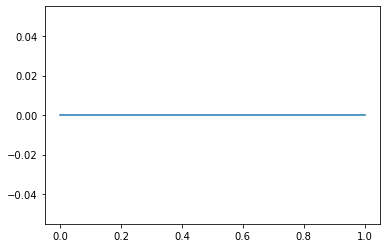

/Users/nahomsileshi/Documents/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


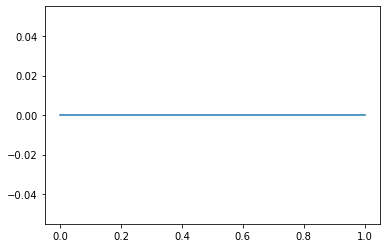

1   HIToolbox                           0x00007ff82202f0c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff82206b638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81cd0774d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81d01a04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81d019f71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff817f4c7fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff817f4da44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff817f5a7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff817f5a3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

In [ ]:
import tkinter as tk
import numpy as np
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Load the diabetes dataset
data = pd.read_csv("pima-indians-diabetes.csv")
data.head()
data = data.rename(index=str, columns={"6":"preg"})
data = data.rename(index=str, columns={"148":"gluco"})
data = data.rename(index=str, columns={"72":"bp"})
data = data.rename(index=str, columns={"35":"stinmm"})
data = data.rename(index=str, columns={"0":"insulin"})
data = data.rename(index=str, columns={"33.6":"mass"})
data = data.rename(index=str, columns={"0.627":"dpf"})
data = data.rename(index=str, columns={"50":"age"})
data = data.rename(index=str, columns={"1":"target"})

data.head()

X = data.iloc[:, :-1]
Y = data.iloc[:,8]

#Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Create the neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, alpha=1e-4,
solver='sgd', verbose=10, tol=1e-4, random_state=1,
learning_rate_init=.1)

#Train the model on the training data
mlp.fit(X_train, Y_train)


# Create the main window
window = tk.Tk()
window.title("Neural Network Predictor")

# Define the questions
questions = [
    "Number of times pregnant:",
    "Plasma glucose concentration:",
    "Diastolic blood pressure (mm Hg):",
    "Triceps skin fold thickness (mm):",
    "2-Hour serum insulin (mu U/ml):",
    "Body mass index (weight in kg/(height in m)^2):",
    "Diabetes pedigree function:",
    "Age (years):"
]

# Create the input fields and labels
input_fields = []
for i in range(8):
    # Create the label
    label = tk.Label(window, text=questions[i])
    label.pack()
    # Create the input field
    input_field = tk.Entry(window)
    input_field.pack()
    input_fields.append(input_field)

# Create the "Predict" button
def on_predict_button_click():
    # Get the input values
    input_values = [float(input_field.get()) for input_field in input_fields]
    # Use the trained model to make a prediction
    prediction = mlp.predict(np.array(input_values).reshape(1, -1))[0]
    # Display the prediction in a graph
    plt.plot([0, 1], [prediction, prediction])
    plt.show()

predict_button = tk.Button(window, text="Predict", command=on_predict_button_click)
predict_button.pack()

# Run the main loop
window.mainloop()
